In [1]:
import numpy as np
import matplotlib.pyplot as plt

import hapod as hp

In [2]:
from tests.test_base import get_test_matrix_half_rank

X, U_true, s_true = get_test_matrix_half_rank(dtype=np.float32, return_Us=True)
mask = ~np.isclose(s_true, 0, atol=1e-5)

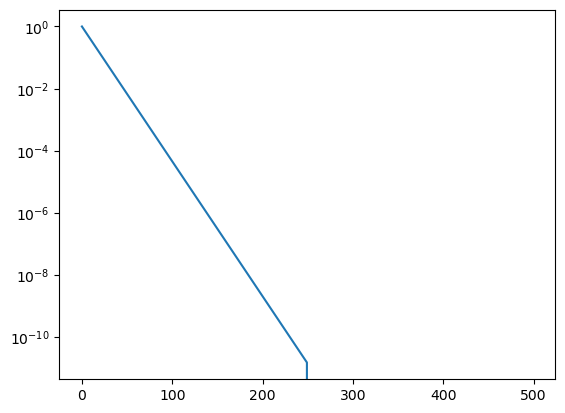

In [3]:
plt.semilogy(s_true)

plt.show()
plt.close()

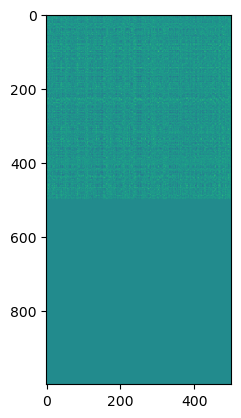

In [4]:
plt.imshow(X)

plt.show()
plt.close()

In [5]:
#exact POD of the snapshots, truncated to rank_max
U_pod, s_pod = hp.get_pod(X)

In [6]:
#check that the singular values are those we set during construction
assert np.allclose(s_pod[mask], s_true[mask], atol=1e-5)

In [7]:
U_rand, s_rand = hp.randomized_pod(np.array_split(X, 2, axis=1),
                                   n_sources_samples=len(s_true),
                                   serializer=hp.InMemorySerializer(),
                                   )

In [11]:
s_rand[:10]

array([1.        , 0.9048374 , 0.8187308 , 0.7408182 , 0.67032003,
       0.60653067, 0.5488116 , 0.4965853 , 0.44932896, 0.40656966],
      dtype=float32)

In [9]:
assert np.allclose(s_rand[mask], s_true[mask], atol=1e-5)

In [10]:
ortho = hp.get_singular_vectors_orthogonality(U_rand[:, mask], U_pod[:, mask])

assert np.allclose(ortho, 1, atol=1e-5)